# **1. Introduction**

In the last decade, hotel booking platforms such as Booking and Trivago have become one of the most widely used tools by users, who, in addition to using the services, have started leaving their own reviews for future customers. This has led to the desire on the part of the property managers to understand the evaluation of their guests' stay, and specifically which services are more or less appreciated, with the aim of identifying aspects of the property to improve and gaining an advantage in terms of bookings.

Based on the data from various hotel guests, the aim of the project is to compare different classification models that can determine, based on a set of attributes, whether customers were satisfied with the service.

# **2. Dataset**

The dataset was downloaded from the following source:

https://www.kaggle.com/datasets/ishansingh88/europe-hotel-satisfaction-score/code

It consists of around 100000 reviews made by clients of some european hotels.

## 2.1 Dataset overview

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/client-satisfaction-classification-dataset/dataset.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (103904, 17)


,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


The dataset has the following structure:
<ul>
    <li>103904 records</li>
    <li>17 features</li>
</ul>

The feature <b> satisfaction </b> is the target feature considered as the label for the training data.
Feature names are changed, deleting special characters (as they could cause some problems in the analysis) like:
<ul>
    <li> "_" from <b>purpose_of_travel</b> feature </li>
    <li> "/" from <b>Departure/Arrival convenience</b> feature </li>
</ul>

In [2]:
df.columns = df.columns.str.replace("/"," ")
df.columns = df.columns.str.replace("_"," ")
display(df.head())

,id,Gender,Age,purpose of travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


Now let's view the dataset summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose of travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

From the summary we can see that the dataset consists of:
<ul>
    <li> 12 attributes of type <i>int64</i> </li>
    <li> 5 attributes of type <i>object</i> </li>
</ul>

## 2.2 Missing values analysis

Inside the dataset there's no missing value. To better see this, let's compute the fraction of missing data for each feature:

In [4]:
pd.DataFrame(df.isnull().sum()/df.shape[0])

,0
id,0.0
Gender,0.0
Age,0.0
purpose of travel,0.0
Type of Travel,0.0
Type Of Booking,0.0
Hotel wifi service,0.0
Departure Arrival convenience,0.0
Ease of Online booking,0.0
Hotel location,0.0


Even if there's no missing data, numerical rating features with value 0 should be considered missing. Because of that, we substitute with <i>NaN</i>:

In [5]:
service_columns = df.columns[6:15]
df[service_columns] = df[service_columns].replace({'0': np.nan, 0: np.nan})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              103904 non-null  int64  
 1   Gender                          103904 non-null  object 
 2   Age                             103904 non-null  int64  
 3   purpose of travel               103904 non-null  object 
 4   Type of Travel                  103904 non-null  object 
 5   Type Of Booking                 103904 non-null  object 
 6   Hotel wifi service              100801 non-null  float64
 7   Departure Arrival  convenience  98604 non-null   float64
 8   Ease of Online booking          99417 non-null   float64
 9   Hotel location                  103903 non-null  float64
 10  Food and drink                  103797 non-null  float64
 11  Stay comfort                    103903 non-null  float64
 12  Common Room ente

In [6]:
pd.DataFrame(df.isnull().sum()/df.shape[0]*100)

,0
id,0.000000
Gender,0.000000
Age,0.000000
purpose of travel,0.000000
Type of Travel,0.000000
Type Of Booking,0.000000
Hotel wifi service,2.986411
Departure Arrival convenience,5.100862
Ease of Online booking,4.318409
Hotel location,0.000962


The attributes with the highest missing data percentage are <b>Departure Arrival convenience</b> and <b>Ease of Online booking</b>, both numerical.
Let's visualize the missing data with an histogram:

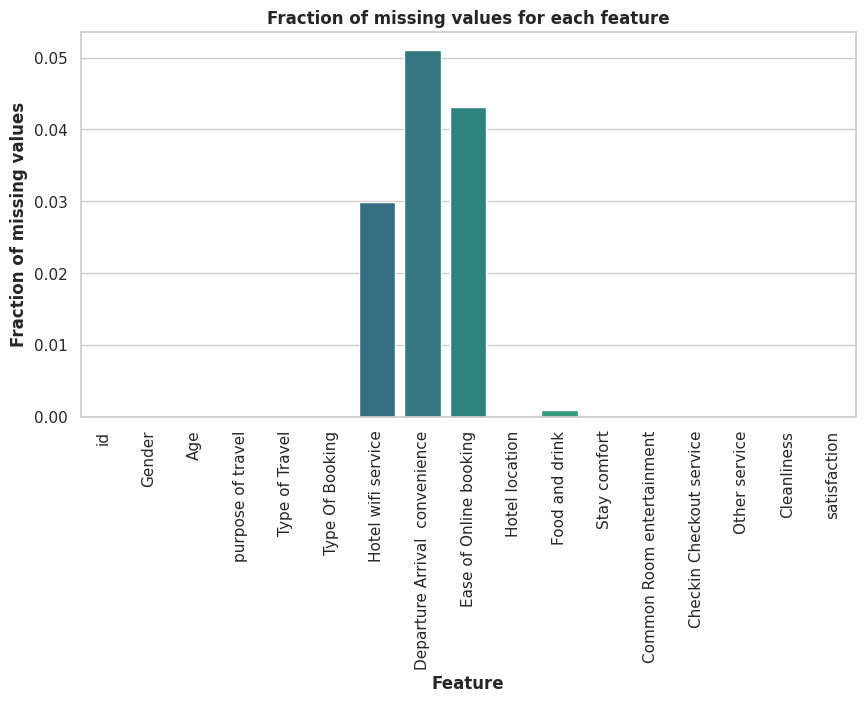

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the fraction of missing data for each feature
missing_data_fraction = df.isnull().sum() / df.shape[0]

# Put the values inside a dataframe
missing_fraction_df = pd.DataFrame(missing_data_fraction, columns=["Missing Fraction"])

# Create the histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_fraction_df.index, y='Missing Fraction', data=missing_fraction_df, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Fraction of missing values', fontweight='bold')
plt.title('Fraction of missing values for each feature', fontweight='bold')
plt.show()

Now, with the dataframe method <i>describe</i>, let's analyze the characteristics of each feature. In particular we'll pay attention to:
<ul>
    <li> average </li>
    <li> percentile </li>
    <li> max and min </li>
</ul>

In [8]:
df.describe()

,id,Age,Hotel wifi service,Departure Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,100801.000000,98604.000000,99417.000000,103903.000000,103797.000000,103903.000000,103890.00000,103903.000000,103901.000000,103904.000000
mean,64924.210502,39.379706,2.813712,3.224788,2.881328,2.976911,3.205430,3.439429,3.35861,3.304322,3.640533,3.286351
std,37463.812252,15.114964,1.257367,1.385790,1.298773,1.277594,1.326235,1.319051,1.33251,1.265360,1.175517,1.312273
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.00000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000


From the analysis we can conclude that:
<ul>
    <li> The average age of the users is 39, with a minimum of 7 and a maximum of 85 </li>
    <li> From the percentiles, we can see that the denser interval of age is [40,51], although there's also a massive number of younger subjects (which lowers the average age) </li>
    <li> Rating features have average values going from 2.81 (<i>Hotel wifi service</i>) and 3.64 (<i>Other service</i>), so taking all the rating features into consideration the average value is around 3, which is equal to the median </li>
</ul>

## 2.3 Categorical features

Now let's analyze the categorical features:

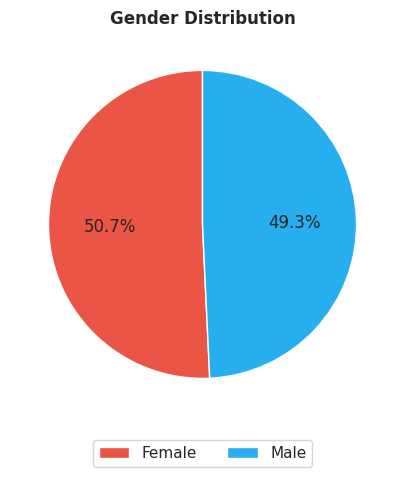

In [9]:
# Determine the distribution of males and females in the dataset
gender_counts = df['Gender'].value_counts()

# Create a pie chart
labels = gender_counts.index
colors = ['#ea5545', '#27aeef']
fig, ax = plt.subplots(1, figsize=(9, 5))
ax.pie(gender_counts, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Gender Distribution', fontweight='bold')
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

purpose of travel
tourism     32053
academic    27219
business    21238
aviation    13846
personal     9548
Name: count, dtype: int64


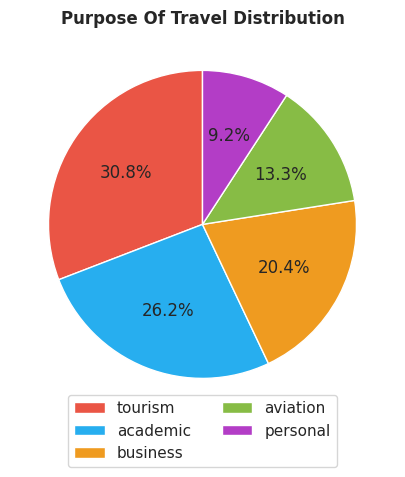

In [10]:
# Determine the distribution of the values of attribute 'Purpose Of Travel'
purpose_of_travel_counts = df['purpose of travel'].value_counts()
print(purpose_of_travel_counts)

# Create pie chart
labels = purpose_of_travel_counts.index
colors = ['#ea5545', '#27aeef','#ef9b20','#87bc45','#b33dc6']
fig, ax = plt.subplots(1, figsize=(9, 5))
ax.pie(purpose_of_travel_counts, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Purpose Of Travel Distribution', fontweight='bold')
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

Type of Travel
Group Travel       71655
Personal Travel    32249
Name: count, dtype: int64


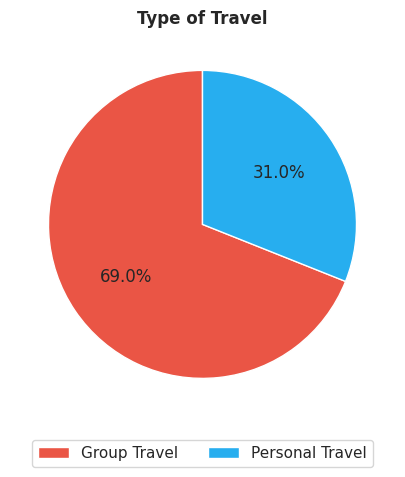

In [11]:
# Determine the distribution for attribute 'Type of Travel'
type_of_travel_counts = df['Type of Travel'].value_counts()
print(type_of_travel_counts)

# Create pie chart

labels = type_of_travel_counts.index
colors = ['#ea5545', '#27aeef']
fig, ax = plt.subplots(1, figsize=(9, 5))
ax.pie(type_of_travel_counts, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Type of Travel', fontweight='bold')
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

Type Of Booking
Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: count, dtype: int64


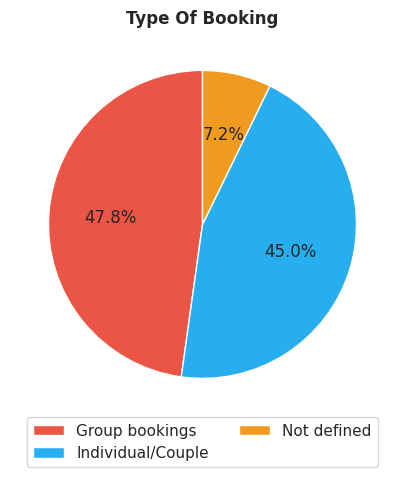

In [12]:
# Determine the distribution for attribute 'Type of Booking'
type_of_booking_counts = df['Type Of Booking'].value_counts()
print(type_of_booking_counts)

# Create pie chart

labels = type_of_booking_counts.index
colors = ['#ea5545', '#27aeef','#ef9b20']
fig, ax = plt.subplots(1, figsize=(9, 5))
ax.pie(type_of_booking_counts, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Type Of Booking', fontweight='bold')
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

7.2% of the data is missing, but this will be dealt with later

## 2.4 Correlation matrix

In this section we'll create the correlation matrix, which gives us information about the correlations between the single features:

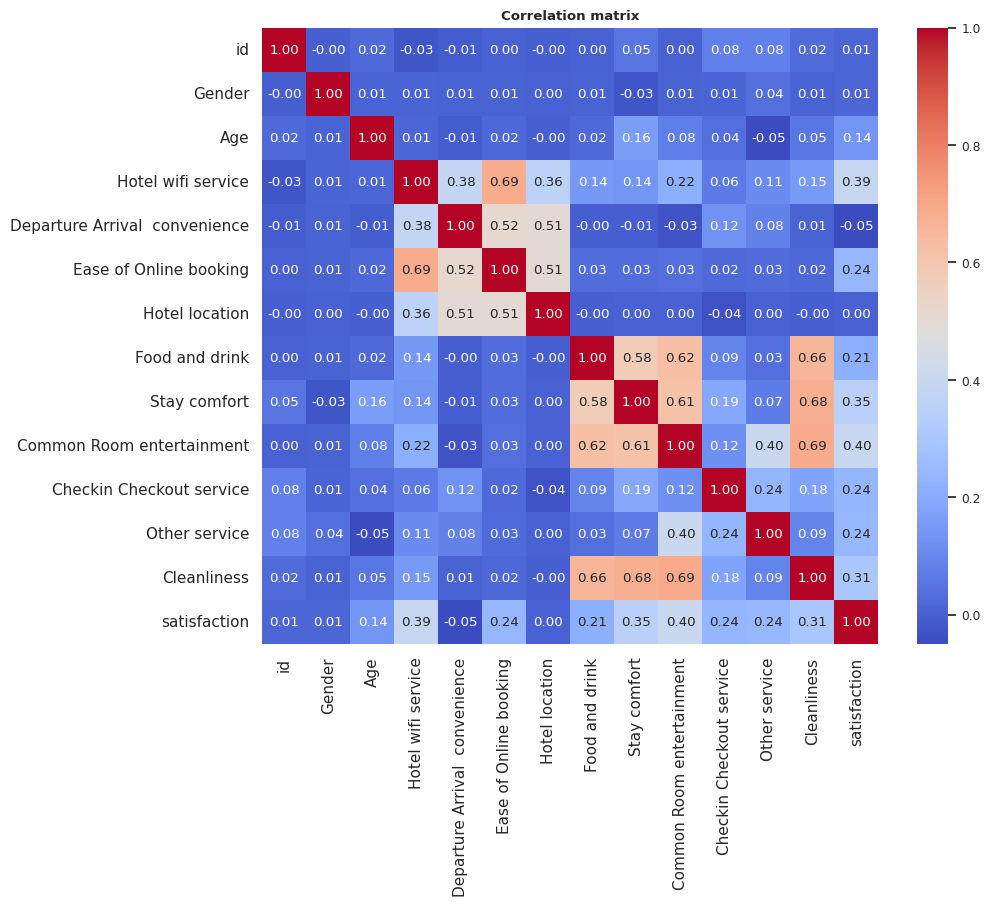

In [13]:
# Select the columns of the dataset to include in the matrix
selected_columns = ['id', 'Gender', 'Age', 'Hotel wifi service', 'Departure Arrival  convenience',
                    'Ease of Online booking', 'Hotel location', 'Food and drink', 'Stay comfort',
                    'Common Room entertainment', 'Checkin Checkout service', 'Other service', 'Cleanliness',
                    'satisfaction']
selected_df = df[selected_columns]

# Map the categorical features to binary values
selected_df['Gender'] = selected_df['Gender'].map({'Female': 0, 'Male': 1})
selected_df['satisfaction'] = selected_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Build the correlation matrix
corr_matrix = selected_df.corr()

# Plot the matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax)
plt.title('Correlation matrix', fontweight='bold')
plt.show()

The correlation matrix shows how none of the single attributes is correlated with the others. We can see a slight correlation between <i>Cleanliness</i> and the following attributes:
<ul>
    <li> Food and drink</li>
    <li> Stay comfort</li>
    <li> Common Room entertainment</li>
</ul>
This suggests how important is for users to stay in a clean environment, as this directly influences other factors like eating or staying in common spaces.

## 2.5 Hypotheses

Let's check the correlation between categorical features and client satisfaction by making some hypotheses.

**HYPOTHESIS 1**: users who made a group travel tend to be more satisfied.

In [14]:
df_travel_type = df.groupby(['Type of Travel', 'satisfaction'])[['id']].count()
df_travel_type = df_travel_type.rename({'id': 'count'}, axis=1)

# Compute the probability w.r.t. every tuple of values determined before
df_travel_type['prob'] = df_travel_type['count'] / df.groupby('Type of Travel').count()['satisfaction']

# Print the result
df_travel_type

count      prob
Type of Travel  satisfaction                            
Group Travel    neutral or dissatisfied  29909  0.417403
                satisfied                41746  0.582597
Personal Travel neutral or dissatisfied  28970  0.898322
                satisfied                 3279  0.101678

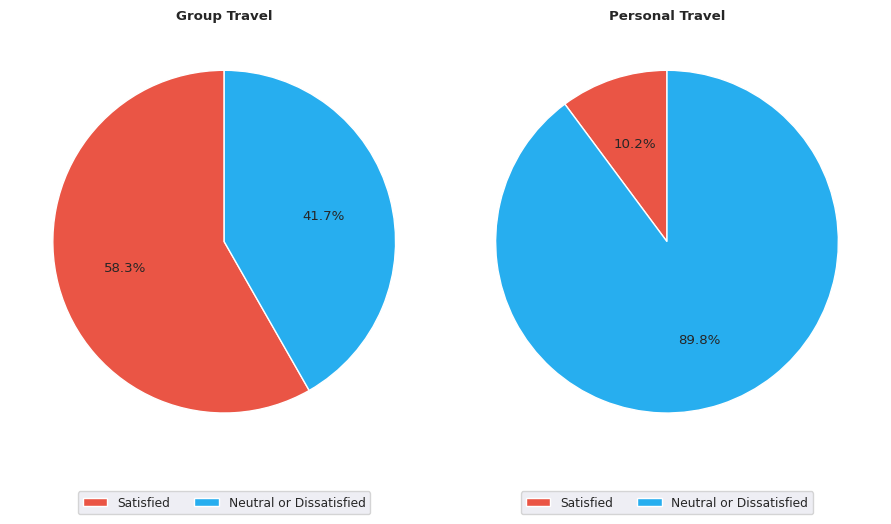

In [15]:
group_traveller = df[df["Type of Travel"] == "Group Travel"]
personal_traveller = df[df["Type of Travel"] == "Personal Travel"]

# Compute the percentage of satisfied and dissatisfied clients for those clients who made a group travel
satisfied_group_traveller = group_traveller[group_traveller["satisfaction"] == "satisfied"].shape[0]
unsatisfied_group_traveller = group_traveller[group_traveller["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_group_traveller = group_traveller.shape[0]
group_traveller_percent = [satisfied_group_traveller / number_of_group_traveller, unsatisfied_group_traveller / number_of_group_traveller]

# Compute the percentage of satisfied and dissatisfied clients for those clients who made a personal travel
satisfied_personal_traveller = personal_traveller[personal_traveller["satisfaction"] == "satisfied"].shape[0]
unsatisfied_personal_traveller = personal_traveller[personal_traveller["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_personal_traveller = group_traveller.shape[0]
group_personal_traveller = [satisfied_personal_traveller / number_of_personal_traveller, unsatisfied_personal_traveller / number_of_personal_traveller]

# Create pie charts

labels = ['Satisfied', 'Neutral or Dissatisfied']
colors = ['#ea5545', '#27aeef']
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

# Create group travel chart
ax[0].pie(group_traveller_percent, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].set_title('Group Travel', fontweight='bold')
ax[0].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

# Create personal travel chart
ax[1].pie(group_personal_traveller, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].set_title('Personal Travel', fontweight='bold')
ax[1].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

These results support the hypothesis, so we conclude that users who made a personal travel tend to be dissatisfied.

**HYPOTHESIS 2**: users who are tourists tend to be more satisfied.

In [16]:
df_travel_purpose = df.groupby(['purpose of travel', 'satisfaction'])[['id']].count()
df_travel_purpose = df_travel_purpose.rename({'id': 'count'}, axis=1)
df_travel_purpose['prob'] = df_travel_purpose['count'] / df.groupby('purpose of travel').count()['satisfaction']
df_travel_purpose

count      prob
purpose of travel satisfaction                            
academic          neutral or dissatisfied  15472  0.568426
                  satisfied                11747  0.431574
aviation          neutral or dissatisfied   7938  0.573306
                  satisfied                 5908  0.426694
business          neutral or dissatisfied  11983  0.564225
                  satisfied                 9255  0.435775
personal          neutral or dissatisfied   5383  0.563783
                  satisfied                 4165  0.436217
tourism           neutral or dissatisfied  18103  0.564783
                  satisfied                13950  0.435217

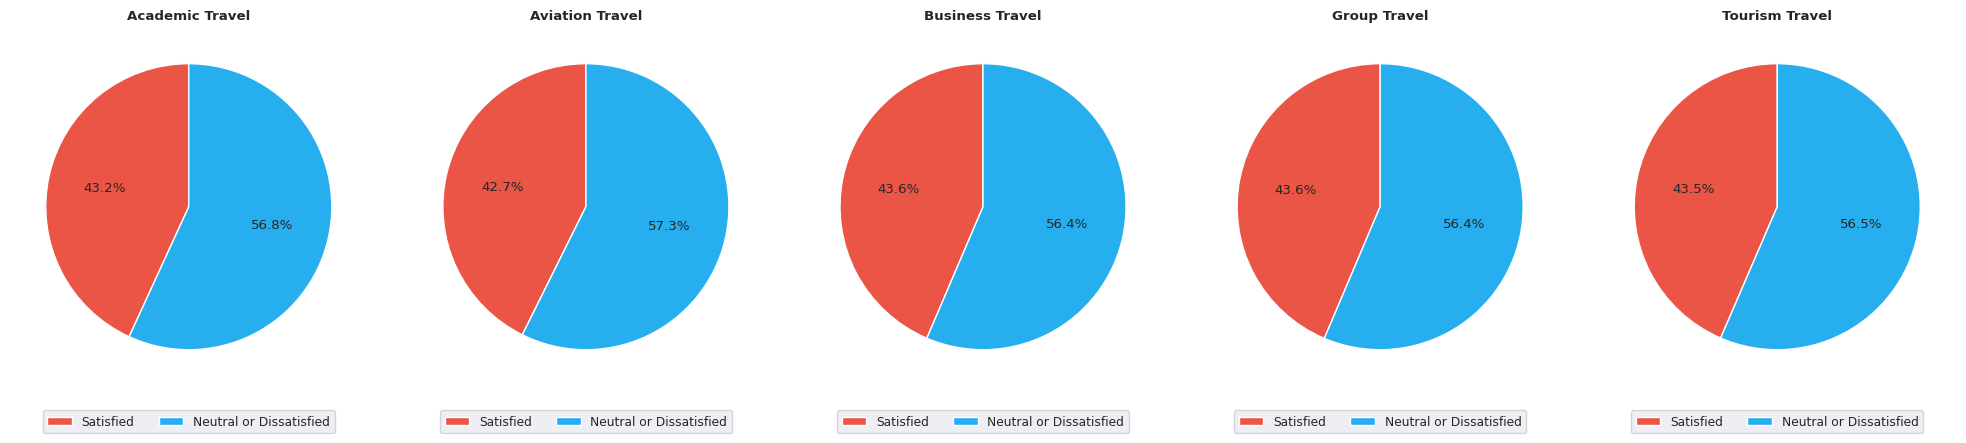

In [17]:
academic_travel = df[df["purpose of travel"] == "academic"]
aviation_travel = df[df["purpose of travel"] == "aviation"]
business_travel = df[df["purpose of travel"] == "business"]
personal_travel = df[df["purpose of travel"] == "personal"]
tourism_travel = df[df["purpose of travel"] == "tourism"]

satisfied_academic_travel = academic_travel[academic_travel["satisfaction"] == "satisfied"].shape[0]
unsatisfied_academic_travel = academic_travel[academic_travel["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_academic_travel = academic_travel.shape[0]
academic_travel_percent = [satisfied_academic_travel / number_of_academic_travel, unsatisfied_academic_travel / number_of_academic_travel]

satisfied_aviation_travel = aviation_travel[aviation_travel["satisfaction"] == "satisfied"].shape[0]
unsatisfied_aviation_travel = aviation_travel[aviation_travel["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_aviation_travel = aviation_travel.shape[0]
group_aviation_travel = [satisfied_aviation_travel / number_of_aviation_travel, unsatisfied_aviation_travel / number_of_aviation_travel]

satisfied_business_travel = business_travel[business_travel["satisfaction"] == "satisfied"].shape[0]
unsatisfied_business_travel = business_travel[business_travel["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_business_travel = business_travel.shape[0]
group_business_travel = [satisfied_business_travel / number_of_business_travel, unsatisfied_business_travel / number_of_business_travel]

satisfied_personal_travel = personal_travel[personal_travel["satisfaction"] == "satisfied"].shape[0]
unsatisfied_personal_travel = personal_travel[personal_travel["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_personal_travel = personal_travel.shape[0]
group_personal_travel = [satisfied_personal_travel / number_of_personal_travel, unsatisfied_personal_travel / number_of_personal_travel]

satisfied_tourism_travel = tourism_travel[tourism_travel["satisfaction"] == "satisfied"].shape[0]
unsatisfied_tourism_travel = tourism_travel[tourism_travel["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_tourism_travel = tourism_travel.shape[0]
group_tourism_travel = [satisfied_tourism_travel / number_of_tourism_travel, unsatisfied_tourism_travel / number_of_tourism_travel]

labels = ['Satisfied', 'Neutral or Dissatisfied']
colors = ['#ea5545', '#27aeef']
fig, ax = plt.subplots(1, 5, figsize=(20, 15))

ax[0].pie(academic_travel_percent, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].set_title('Academic Travel', fontweight='bold')
ax[0].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[1].pie(group_aviation_travel, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].set_title('Aviation Travel', fontweight='bold')
ax[1].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[2].pie(group_business_travel, autopct='%1.1f%%', startangle=90, colors=colors)
ax[2].set_title('Business Travel', fontweight='bold')
ax[2].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[3].pie(group_personal_travel, autopct='%1.1f%%', startangle=90, colors=colors)
ax[3].set_title('Group Travel', fontweight='bold')
ax[3].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[4].pie(group_tourism_travel, autopct='%1.1f%%', startangle=90, colors=colors)
ax[4].set_title('Tourism Travel', fontweight='bold')
ax[4].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

The hypothesis isn't supported, apparently there's no correlation between the purpose of the travel and client satisfaction.

# **3. Data preprocessing**

Before creating the classification models, we need to preprocess data. We can skip some important steps (otherwise needed):
<ul>
    <li> Outlier detection: the features are categorical or discrete, so there are no outliers </li>
    <li> Data normalization: all the values of the features are in the same range, so there's no need to normalize </li>
</ul>

## 3.1 Missing value replacement

Now we're going to deal with the missing values detected earlier. In particular, we make the following choices:
<ul>
    <li> Missing values of rating features (values between 1 and 5) will be replaced with the median </li>
    <li> Missing values of the <i>Type of Booking</i> feature will be replaced depending on the value of the <i>Type of Travel</i> feature </li>
</ul>

Type Of Booking
Group bookings       53555
Individual/Couple    50349
Name: count, dtype: int64


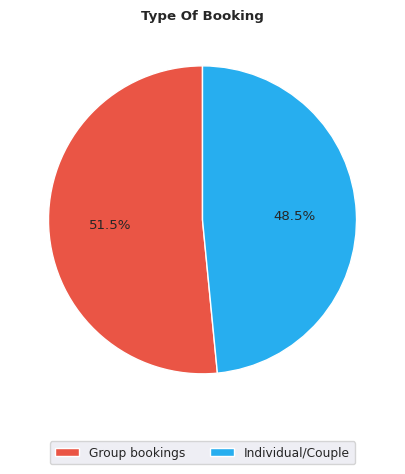

In [18]:
# Replacement for rating features
replaced_columns = df.columns[6:16]
medians = df[replaced_columns].median()
df[replaced_columns] = df[replaced_columns].fillna(medians)

# Replacement of Type of Booking feature
df.loc[(df['Type Of Booking'] == 'Not defined') & (df['Type of Travel'] == 'Group Travel'), 'Type Of Booking'] = 'Group bookings'
df.loc[(df['Type Of Booking'] == 'Not defined') & (df['Type of Travel'] == 'Personal Travel'), 'Type Of Booking'] = 'Individual/Couple'

# Show the new distribution for Type of Booking feature
type_of_booking_counts = df['Type Of Booking'].value_counts()
print(type_of_booking_counts)
labels = type_of_booking_counts.index
colors = ['#ea5545', '#27aeef','#ef9b20']
fig, ax = plt.subplots(1, figsize=(9, 5))
ax.pie(type_of_booking_counts, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Type Of Booking', fontweight='bold')
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

In [19]:
# Show there are no more missing values
pd.DataFrame(df.isnull().sum()/df.shape[0]*100)

,0
id,0.0
Gender,0.0
Age,0.0
purpose of travel,0.0
Type of Travel,0.0
Type Of Booking,0.0
Hotel wifi service,0.0
Departure Arrival convenience,0.0
Ease of Online booking,0.0
Hotel location,0.0


## 3.2 Non-explanatory features removal

As we can see from the correlation matrix, the features <i>id, Gender, Hotel location, Departure Arrival convenience</i> are not correlated with <i>satisfaction</i>. For this reason, the corresponding columns are removed, so that the complexity of the classification models is reduced.

In [20]:
df = df.drop("id", axis=1)
df = df.drop("Gender", axis=1)
df = df.drop("Hotel location", axis=1)
df = df.drop("Departure Arrival  convenience", axis=1)
print('-'*50 )
print("Shape after feature removal", df.shape)
print('-'*50 )

--------------------------------------------------
Shape after feature removal (103904, 13)
--------------------------------------------------


## 3.3 One-hot encoding

We apply the one-hot encoding to the categorical data:

In [21]:
purpose_of_travel_encoded = pd.get_dummies(df['purpose of travel'])
type_of_travel_encoded = pd.get_dummies(df['Type of Travel'])
type_of_booking_encoded = pd.get_dummies(df['Type Of Booking'])
print('-'*50 )
print('-'*50 )
print('Purpose Of Travel Distribution encoded shape: ',purpose_of_travel_encoded.shape)
print('-'*50 )
print('-'*50 )
print('Type of Travel encoded shape: ',type_of_travel_encoded.shape)
print('-'*50 )
print('-'*50 )
print('Type of Booking encoded shape: ',type_of_booking_encoded.shape)
print('-'*50 )
print('-'*50 )

# Add the new columns to the dataframe
df = df.drop("purpose of travel", axis=1)
df = df.drop("Type of Travel", axis=1)
df = df.drop("Type Of Booking", axis = 1)
df = pd.concat([df,purpose_of_travel_encoded], axis= 1)
df = pd.concat([df,type_of_travel_encoded], axis= 1)
df = pd.concat([df,type_of_booking_encoded], axis= 1)
satisfaction_column = df["satisfaction"]
df = df.drop("satisfaction", axis=1)
df = pd.concat([df,satisfaction_column], axis= 1)
print('-'*50 )
print('Shape after one-hot encoding: ', df.shape)
print('-'*50 )
display(df.head())

--------------------------------------------------
--------------------------------------------------
Purpose Of Travel Distribution encoded shape:  (103904, 5)
--------------------------------------------------
--------------------------------------------------
Type of Travel encoded shape:  (103904, 2)
--------------------------------------------------
--------------------------------------------------
Type of Booking encoded shape:  (103904, 2)
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Shape after one-hot encoding:  (103904, 19)
--------------------------------------------------


,Age,Hotel wifi service,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin Checkout service,Other service,Cleanliness,academic,aviation,business,personal,tourism,Group Travel,Personal Travel,Group bookings,Individual/Couple,satisfaction
0,13,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5,False,True,False,False,False,False,True,False,True,neutral or dissatisfied
1,25,3.0,3.0,1.0,1.0,1.0,1.0,4.0,1,False,False,False,False,True,True,False,True,False,neutral or dissatisfied
2,26,2.0,2.0,5.0,5.0,5.0,4.0,4.0,5,False,False,False,False,True,True,False,True,False,satisfied
3,25,2.0,5.0,2.0,2.0,2.0,1.0,4.0,2,False,False,False,False,True,True,False,True,False,neutral or dissatisfied
4,61,3.0,3.0,4.0,5.0,3.0,3.0,3.0,3,False,True,False,False,False,True,False,True,False,satisfied


## 3.4 Class balance

Now we check if the two classes of the <i>satisfaction</i> feature (<i>Satisfied</i>, <i>Neutral or Dissatisfied</i>) are balanced.

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


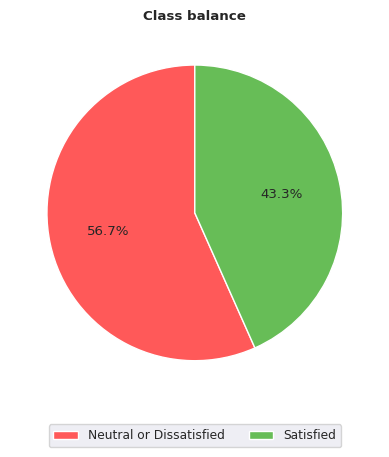

In [22]:
satisfaction_rate = df['satisfaction'].value_counts(normalize=True) * 100
print(satisfaction_rate)
labels = ['Neutral or Dissatisfied', 'Satisfied']
colors = ['#FF5959', '#67BD57']
plt.pie([satisfaction_rate[0],satisfaction_rate[1] ], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class balance', fontweight = 'bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

There are slightly more examples of the <i>Neutral or Dissatisfied</i> class, so we can apply one of the following techniques:
<ul>
    <li> **Oversampling**: adding new records to the dataset having the unrepresented class (risk of overfitting) </li>
    <li> **Undersampling**: removing records from the dataset having the overrepresented class </li>
</ul>

### Oversampling

--------------------------------------------------
Shape after oversampling:  (117758, 19)
--------------------------------------------------
--------------------------------------------------
satisfaction
neutral or dissatisfied    50.0
satisfied                  50.0
Name: proportion, dtype: float64
--------------------------------------------------


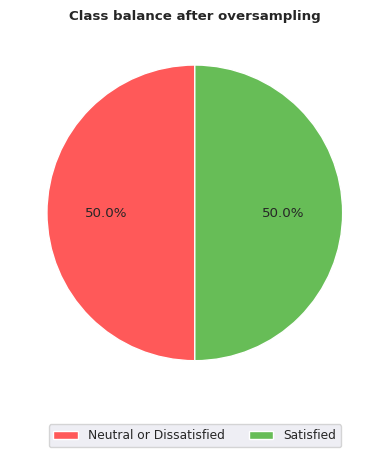

In [23]:
from sklearn.utils import resample

df_positive_class = df[df['satisfaction'] == 'satisfied']
df_negative_class = df[df['satisfaction'] == 'neutral or dissatisfied']

oversampled_positive_class = resample(df_positive_class, replace=True, n_samples=len(df_negative_class), random_state=42)
oversampled_df = pd.concat([df_negative_class, oversampled_positive_class])

print('-'*50 )
print('Shape after oversampling: ', oversampled_df.shape)
print('-'*50 )

satisfaction_rate = oversampled_df['satisfaction'].value_counts(normalize=True) * 100
print('-'*50 )
print(satisfaction_rate )
print('-'*50 )

labels = ['Neutral or Dissatisfied', 'Satisfied']
colors = ['#FF5959', '#67BD57']
plt.pie([satisfaction_rate[0],satisfaction_rate[1] ], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Class balance after oversampling", fontweight = 'bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# **4. Classification models**

## 4.1 Training set and test set

In [24]:
X = df.drop('satisfaction', axis=1)
X1 = X.drop('Age',axis=1)
Y = df['satisfaction']
print(type(Y))
print('-'*50)
print('X')
display(X.head())
print('-'*50)
print('Y')
display(Y.count)
print('-'*50)

<class 'pandas.core.series.Series'>
--------------------------------------------------
X


,Age,Hotel wifi service,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin Checkout service,Other service,Cleanliness,academic,aviation,business,personal,tourism,Group Travel,Personal Travel,Group bookings,Individual/Couple
0,13,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5,False,True,False,False,False,False,True,False,True
1,25,3.0,3.0,1.0,1.0,1.0,1.0,4.0,1,False,False,False,False,True,True,False,True,False
2,26,2.0,2.0,5.0,5.0,5.0,4.0,4.0,5,False,False,False,False,True,True,False,True,False
3,25,2.0,5.0,2.0,2.0,2.0,1.0,4.0,2,False,False,False,False,True,True,False,True,False
4,61,3.0,3.0,4.0,5.0,3.0,3.0,3.0,3,False,True,False,False,False,True,False,True,False


--------------------------------------------------
Y


<bound method Series.count of 0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object>

--------------------------------------------------


We partition the dataset in two subsets (training set and test set): in particular we choose to take the 20% of the dataset as the test set.

## 4.2 Evaluation metrics

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import auc

df_results = pd.DataFrame(columns=['Model','Accuracy (Training)', 'Precision (Training)', 'Recall (Training)', 'Specificity (Training)', 'F-Measure (Training)', 'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'Specificity (Test)', 'F-Measure (Test)'])

def classify(method, model, X, Y):
  df_tmp = pd.DataFrame(columns=['Model', 'Accuracy (Training)', 'Precision (Training)', 'Recall (Training)', 'Specificity (Training)', 'F-Measure (Training)', 'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'Specificity (Test)', 'F-Measure (Test)'])
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  model.fit(X_train, Y_train)
  results = evaluate(method, model, X_train, Y_train, X_test, Y_test)
  df_tmp = pd.concat([df_tmp, pd.DataFrame(results).transpose()])
  Y_pred = model.predict(X_test)
  cm = confusion_matrix(Y_test, Y_pred)
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  plot_confusion_matrix(cm, ax=axes[0])
  plot_roc_curve(model, X_test, Y_test, ax=axes[1])
  axes[0].set_title('Confusion matrix')
  axes[1].set_title('ROC curve')
  plt.tight_layout()
  plt.show()
  return df_tmp

def evaluate(method, model, X_train, Y_train, X_test, Y_test):
  Y_train_pred = model.predict(X_train)
  accuracy_train = accuracy_score(Y_train, Y_train_pred)
  precision_train = precision_score(Y_train, Y_train_pred, pos_label='satisfied')
  recall_train = recall_score(Y_train, Y_train_pred, pos_label='satisfied')
  tn, fp, fn, tp = confusion_matrix(Y_train, Y_train_pred).ravel()
  specificity_train = tn / (tn + fp)
  f_measure_train = f1_score(Y_train, Y_train_pred, pos_label='satisfied')
  Y_test_pred = model.predict(X_test)
  accuracy_test = accuracy_score(Y_test, Y_test_pred)
  precision_test = precision_score(Y_test, Y_test_pred, pos_label='satisfied')
  recall_test = recall_score(Y_test, Y_test_pred, pos_label='satisfied')
  tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_pred).ravel()
  specificity_test = tn / (tn + fp)
  f_measure_test = f1_score(Y_test, Y_test_pred, pos_label='satisfied')
  curr_results = pd.Series({
    'Model': method,
    'Accuracy (Training)': accuracy_train,
    'Precision (Training)': precision_train,
    'Recall (Training)': recall_train,
    'Specificity (Training)': specificity_train,
    'F-Measure (Training)': f_measure_train,
    'Accuracy (Test)': accuracy_test,
    'Precision (Test)': precision_test,
    'Recall (Test)': recall_test,
    'Specificity (Test)': specificity_test,
    'F-Measure (Test)': f_measure_test
  })
  return curr_results

def plot_confusion_matrix(cm, ax=None):
  if ax is None:
    fig, ax = plt.subplots(figsize=(6, 4))
  sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', ax=ax, xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
  ax.set_title('Confusion Matrix of the best model (TEST)', fontweight='bold')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
    
def plot_roc_curve(model, X, y, ax=None):
  if ax is None:
      fig, ax = plt.subplots(figsize=(6, 4))
  y_pred_prob = model.predict_proba(X)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob, pos_label='satisfied')
  roc_auc = auc(fpr, tpr)
  ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  ax.plot([0, 1], [0, 1], 'k--')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('Receiver Operating Characteristic (TEST)', fontweight='bold')
  ax.legend(loc="lower right")

def comparison_plot(df_results):
  df_tidy = df_results.T
  df_tidy.columns = df_tidy.iloc[0]
  df_tidy = df_tidy[1:]
  df_tidy = df_tidy.reset_index()
  df_melted = df_tidy.melt(id_vars='index', var_name='Metric', value_name='Value')
  colors = sns.color_palette('Set3', n_colors=len(df_melted['Metric'].unique()))
  sns.barplot(x='index', y='Value', hue='Metric', data=df_melted, palette=colors, edgecolor='black' )
  plt.xlabel('Metric')
  plt.ylabel('Value')
  plt.title('Metric comparison')
  plt.xticks(rotation=90)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., ncol=1)
  plt.show()

## 4.3 Decision Trees

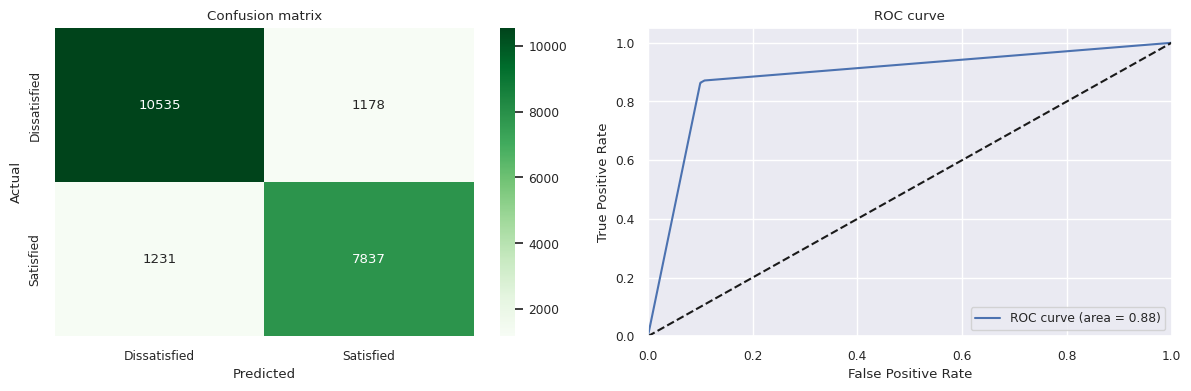

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision tree no max depth,0.993768,0.997949,0.987624,0.998452,0.992759,0.884077,0.869329,0.864248,0.899428,0.866781


In [26]:
from sklearn.tree import DecisionTreeClassifier

df_results_tree_no_max_depth = classify("Decision tree no max depth", DecisionTreeClassifier(random_state = 42), X, Y )
display(df_results_tree_no_max_depth)

We didn't set a maximum depth for this decision tree, so as we can see there's overfitting. Now let's make a grid search to set the best model parameters:

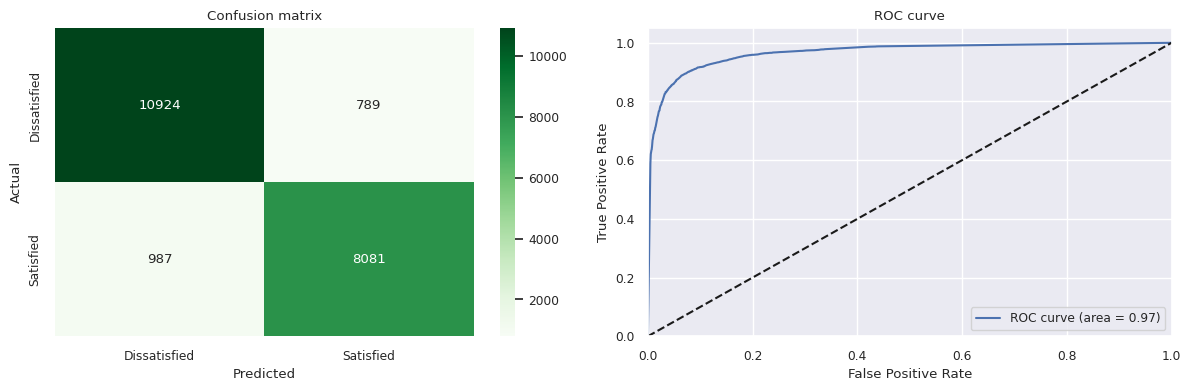

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 13, 'min_samples_split': 2}


,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision_trees_grid,0.922873,0.919974,0.899992,0.940317,0.909873,0.914537,0.911048,0.891156,0.932639,0.900992


In [27]:
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy' ],
    'max_depth': [ 15, 20],
    'min_samples_split': [2, 4], 
    'min_samples_leaf': [13, 15]
}
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
df_results_tree_grid = classify("Decision_trees_grid", grid_search, X, Y )
print('Best parameters: ', grid_search.best_params_)
display(df_results_tree_grid)

The best model doesn't show overfitting. Now let's compare the previous model with the best model:

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision tree no max depth,0.993768,0.997949,0.987624,0.998452,0.992759,0.884077,0.869329,0.864248,0.899428,0.866781
0,Decision_trees_grid,0.922873,0.919974,0.899992,0.940317,0.909873,0.914537,0.911048,0.891156,0.932639,0.900992


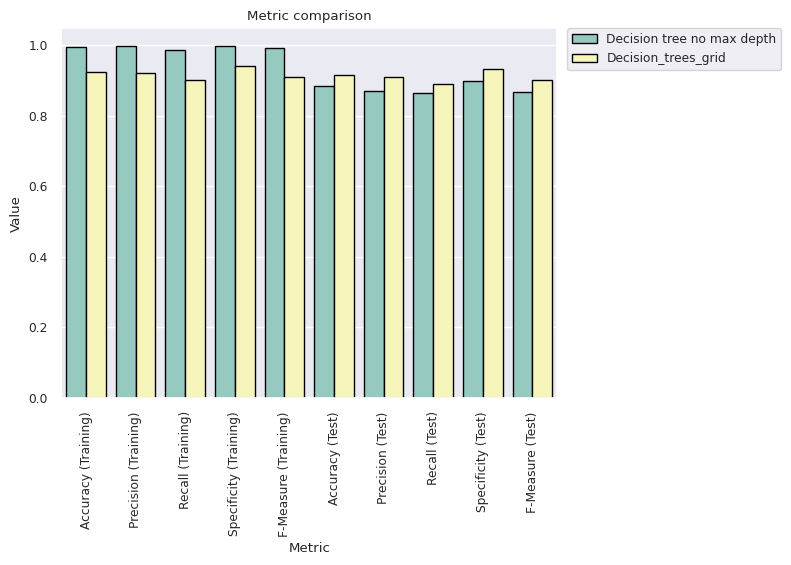

In [28]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_results_tree_no_max_depth,df_results_tree_grid])
display(df_results)
comparison_plot(df_results)

## 4.4 Logistic Regression

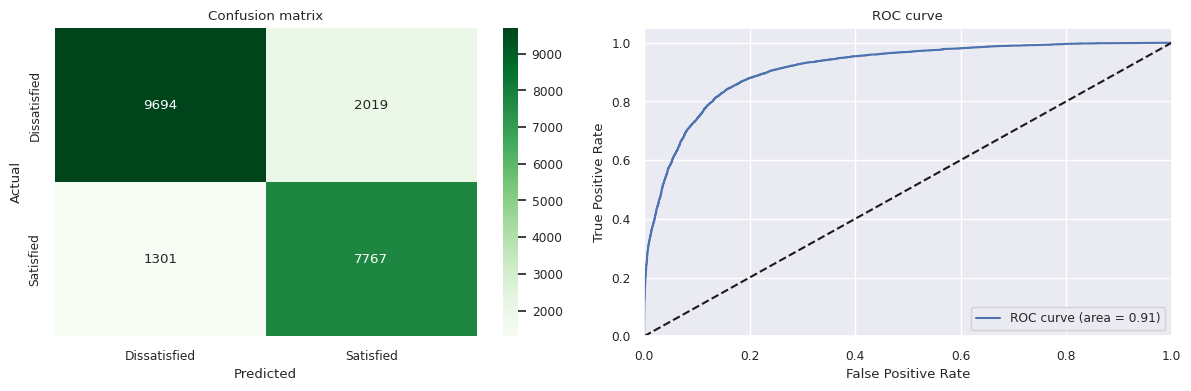

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Regression L1,0.839202,0.792349,0.851406,0.829899,0.820817,0.840239,0.793685,0.856528,0.827627,0.82391


In [29]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(random_state = 42, solver = 'liblinear' , class_weight = 'balanced', penalty = 'l1')
df_reg_l1 = classify('Logistic Regression L1', log_reg_l1, X,Y)
display(df_reg_l1)

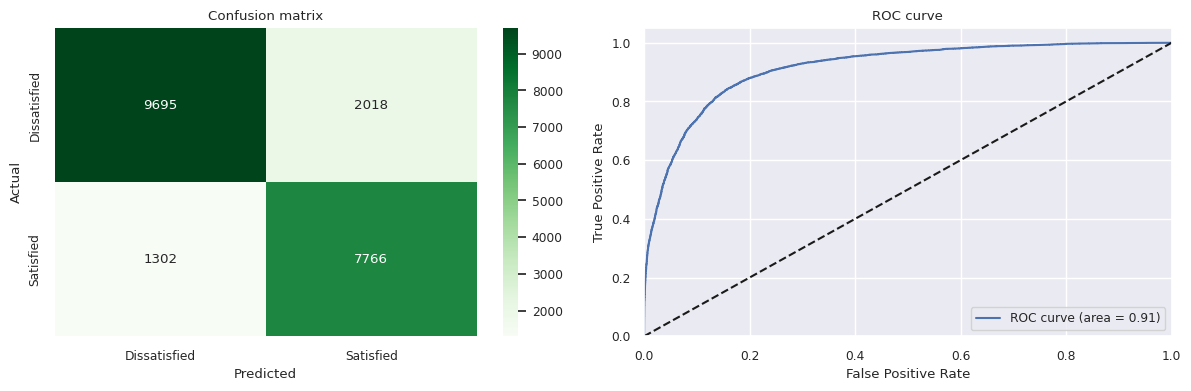

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Regression L2,0.839238,0.792381,0.851461,0.82992,0.820859,0.840239,0.793745,0.856418,0.827713,0.823891


In [30]:
log_reg_l2 = LogisticRegression(random_state = 42, solver = 'liblinear' , penalty = 'l2', class_weight = 'balanced')
df_reg_l2 = classify('Logistic Regression L2', log_reg_l2, X,Y)
display(df_reg_l2)

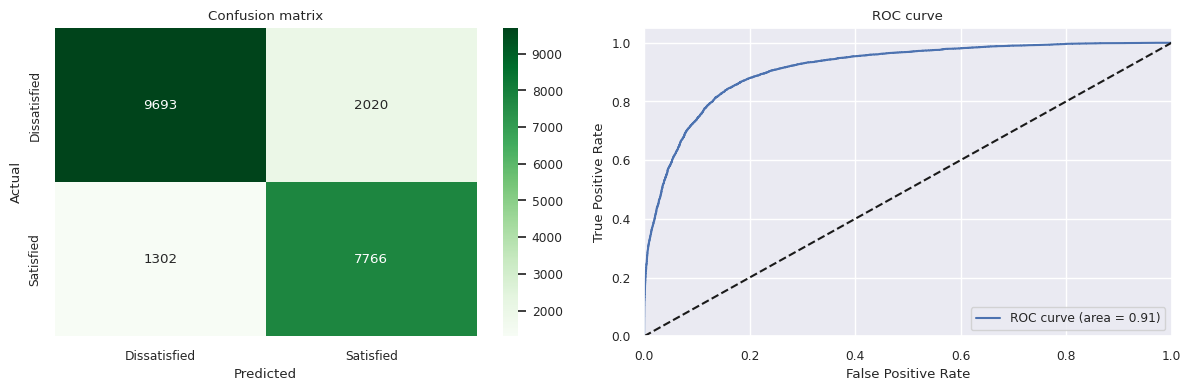

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Regression ElasticNet,0.839238,0.792381,0.851461,0.82992,0.820859,0.840142,0.793583,0.856418,0.827542,0.823804


In [31]:
log_reg_sag = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5,  class_weight = 'balanced')
df_reg_sag = classify('Logistic Regression ElasticNet', log_reg_sag, X,Y)
display(df_reg_sag)

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Regression L1,0.839202,0.792349,0.851406,0.829899,0.820817,0.840239,0.793685,0.856528,0.827627,0.82391
0,Logistic Regression L2,0.839238,0.792381,0.851461,0.82992,0.820859,0.840239,0.793745,0.856418,0.827713,0.823891
0,Logistic Regression ElasticNet,0.839238,0.792381,0.851461,0.82992,0.820859,0.840142,0.793583,0.856418,0.827542,0.823804


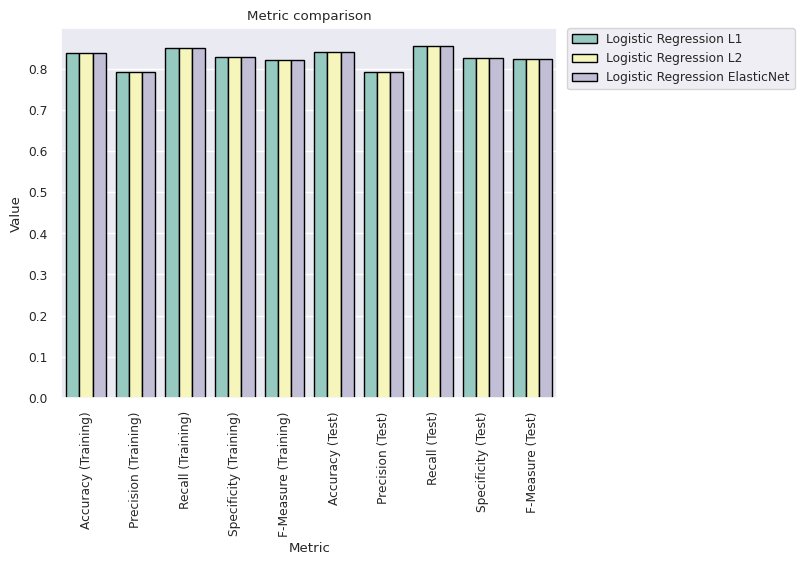

In [32]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_reg_l1, df_reg_l2,df_reg_sag])
display(df_results)
comparison_plot(df_results)

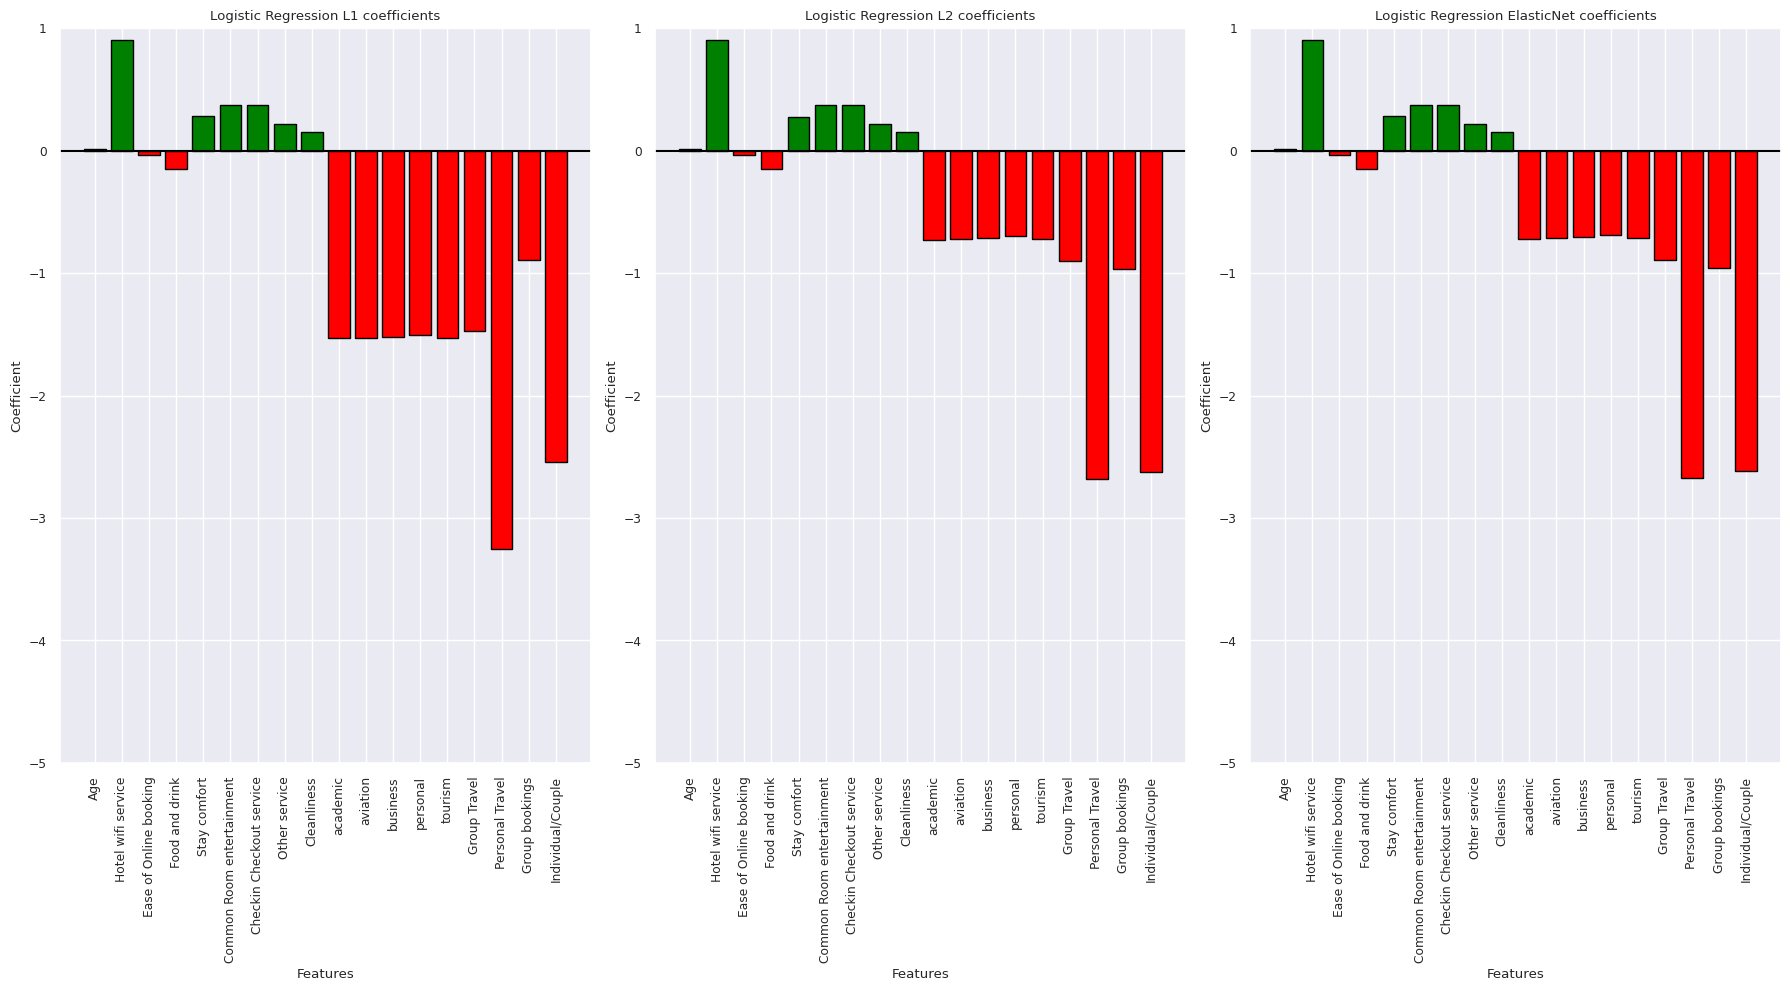

In [33]:
coefficients_l1 = log_reg_l1.coef_[0]
coefficients_l2 = log_reg_l2.coef_[0]
coefficients_elasticnet = log_reg_sag.coef_[0]
feature_names = X.columns
colors_l1 = ['red' if c < 0 else 'green' for c in coefficients_l1]
colors_l2 = ['red' if c < 0 else 'green' for c in coefficients_l2]
colors_l2 = ['red' if c < 0 else 'green' for c in coefficients_elasticnet]
fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3, figsize=(18, 10))
ax1.bar(feature_names, coefficients_l1, color=colors_l1, edgecolor='black')
ax2.bar(feature_names, coefficients_l2, color=colors_l2, edgecolor='black')
ax3.bar(feature_names, coefficients_elasticnet, color=colors_l2, edgecolor='black')
ax1.set_title("Logistic Regression L1 coefficients")
ax1.set_xlabel("Features")
ax1.set_ylabel("Coefficient")
ax2.set_title("Logistic Regression L2 coefficients")
ax2.set_xlabel("Features")
ax2.set_ylabel("Coefficient")
ax3.set_title("Logistic Regression ElasticNet coefficients")
ax3.set_xlabel("Features")
ax3.set_ylabel("Coefficient")
ax1.axhline(0, color='black')
ax2.axhline(0, color='black')
ax3.axhline(0, color='black')
ax1.set_xticklabels(feature_names, rotation=90)
ax2.set_xticklabels(feature_names, rotation=90)
ax3.set_xticklabels(feature_names, rotation=90)
ax1.set_ylim(-5, 1)
ax2.set_ylim(-5, 1)
ax3.set_ylim(-5, 1)
plt.tight_layout()
plt.show()

The L1 and L2 logistic regression models use the <i>liblinear</i> algorithm, while the ElasticNet logistic regression model uses the <i>saga</i> algorithm, which is based on stochastic gradient descent.
<ul>
    <li> From the metric comparison plot we can see that the three models perform similarly, so there's no enough information to choose the best model </li>
    <li> From the other plots we can see that L1 penalty tends to make negative coefficients bigger (in absolute value), allowing a better differentiation between the classes </li>
</ul>
For these reasons, the best logistic regression model is the one with L1 penalty.

## 4.5 Stochastic Gradient Descent

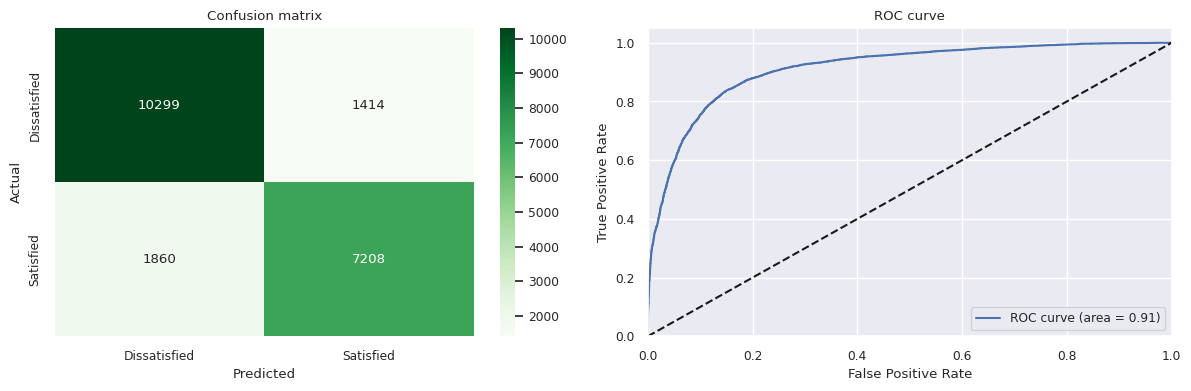

Best parameters:  {'loss': 'log_loss', 'penalty': 'l1'}


,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,SGD grid constant,0.839383,0.83299,0.786356,0.879807,0.809001,0.842452,0.836001,0.794883,0.879279,0.814924


In [34]:
from sklearn.linear_model import SGDClassifier

sgd_constant = SGDClassifier(learning_rate = 'constant', random_state = 42, eta0 = 0.01)
param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['log_loss', 'squared_error'],
}
grid_search_constant = GridSearchCV(estimator=sgd_constant, param_grid=param_grid, cv = 5)
df_results_sgd_grid_constant = classify('SGD grid constant', grid_search_constant, X,Y)
print('Best parameters: ', grid_search_constant.best_params_)
display(df_results_sgd_grid_constant)

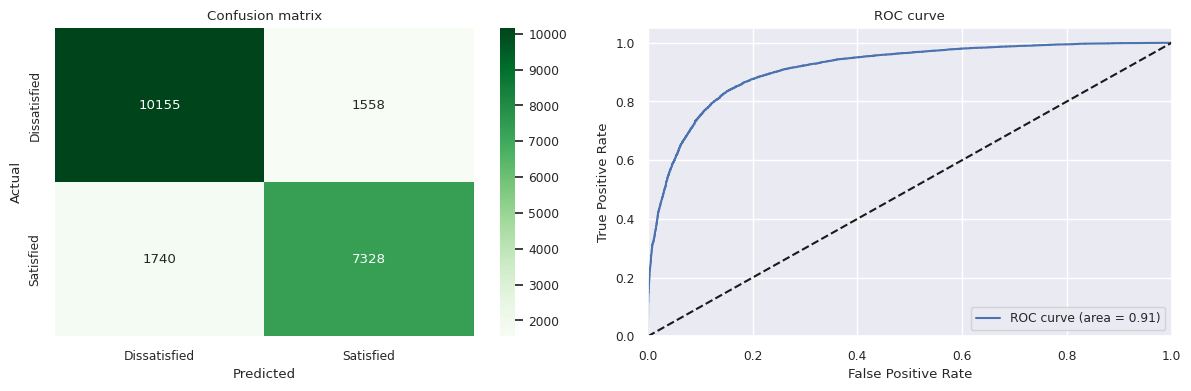

Best parameters:  {'loss': 'log_loss', 'penalty': 'l1'}


,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,SGD grid opt,0.840177,0.823239,0.802931,0.868571,0.812958,0.841297,0.824668,0.808116,0.866985,0.816308


In [35]:
sgd_opt = SGDClassifier(random_state = 42, learning_rate = 'optimal',eta0 = 0.01)
grid_search_opt = GridSearchCV(estimator=sgd_opt, param_grid=param_grid, cv = 5)
df_results_sgd_grid_opt = classify('SGD grid opt', grid_search_opt, X,Y)
print('Best parameters: ', grid_search_opt.best_params_)
display(df_results_sgd_grid_opt)

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,SGD grid constant,0.839383,0.83299,0.786356,0.879807,0.809001,0.842452,0.836001,0.794883,0.879279,0.814924
0,SGD grid opt,0.840177,0.823239,0.802931,0.868571,0.812958,0.841297,0.824668,0.808116,0.866985,0.816308


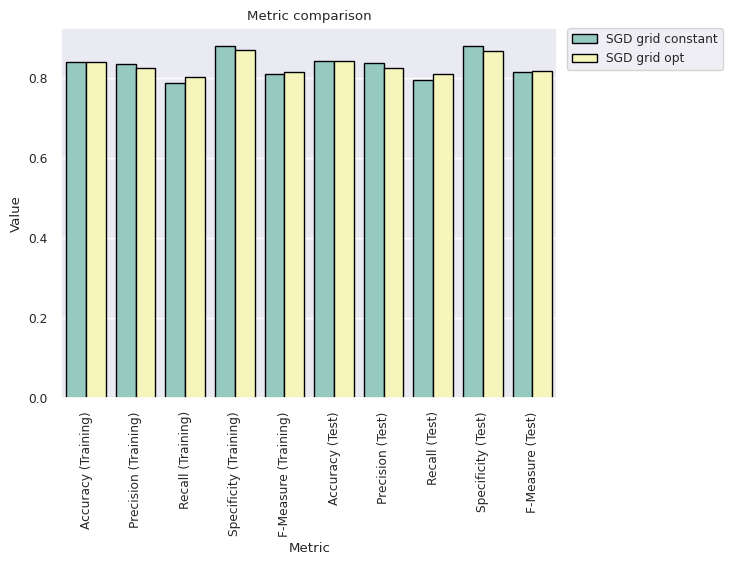

In [36]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_results_sgd_grid_constant, df_results_sgd_grid_opt])
display(df_results)
comparison_plot(df_results)

We determine that the best model is the one with optimal learning rate.

## 4.6 Neural Networks (MLP)

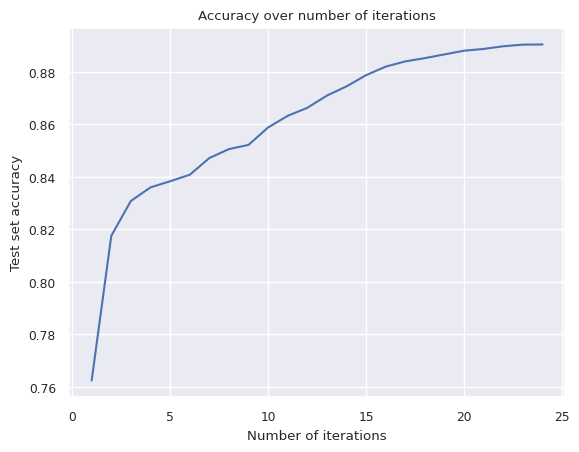

0.8905046966430551

In [38]:
from sklearn.neural_network import MLPClassifier

neural_network= MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes= (20, 20), learning_rate = 'constant', solver= 'sgd', tol=5e-5)
convergence_threshold = 1e-4
accuracy_values = []
converged = False
while not converged:
    neural_network.partial_fit(X, Y, classes=np.unique(Y))
    accuracy = neural_network.score(X, Y)
    accuracy_values.append(accuracy)
    if len(accuracy_values) > 1 and np.abs(accuracy_values[-1] - accuracy_values[-2]) < convergence_threshold:
        converged = True
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values)
plt.xlabel('Number of iterations')
plt.ylabel('Test set accuracy')
plt.title('Accuracy over number of iterations')
plt.show()
# Final accuracy
accuracy_values[-1]

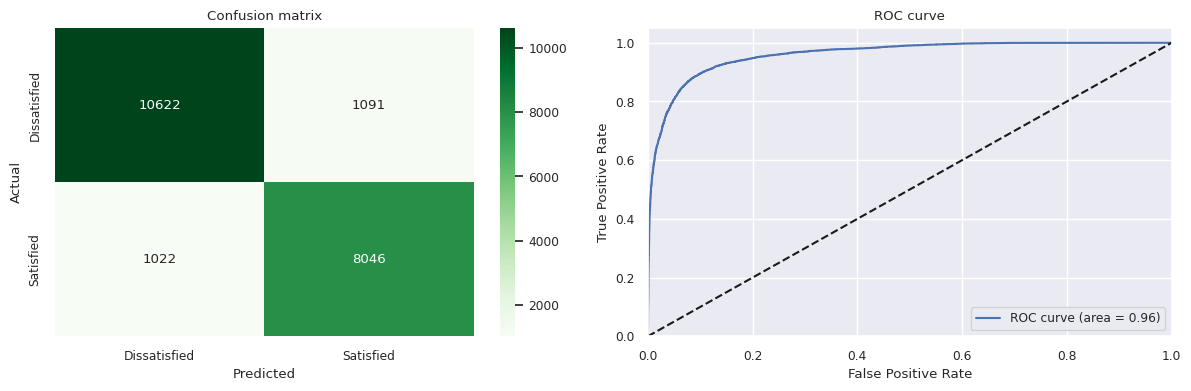

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Two layer 20 neurons neural network,0.897225,0.876752,0.887115,0.904932,0.881903,0.898321,0.880595,0.887296,0.906856,0.883933


In [42]:
df_results_nn = classify("Two layer 20 neurons neural network", neural_network, X, Y)
display(df_results_nn)

Now we test the performances of two neural networks with only one hidden layer

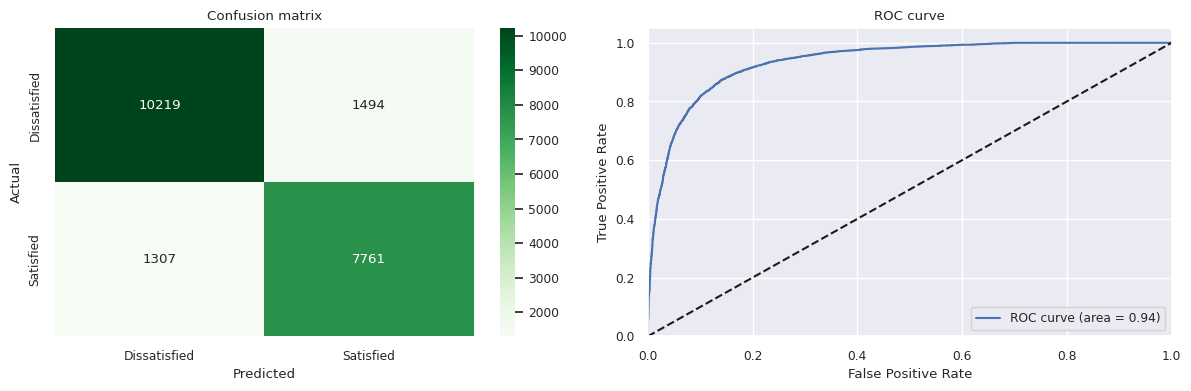

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Single layer 10 neurons Neural Network,0.862517,0.835747,0.849042,0.87279,0.842342,0.865213,0.838574,0.855867,0.872449,0.847132


In [39]:
neural_network_single_10 = MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes= (10,), learning_rate = 'constant', solver= 'sgd')
df_results_nn_single_10 = classify("Single layer 10 neurons Neural Network", neural_network_single_10, X, Y )
display(df_results_nn_single_10)

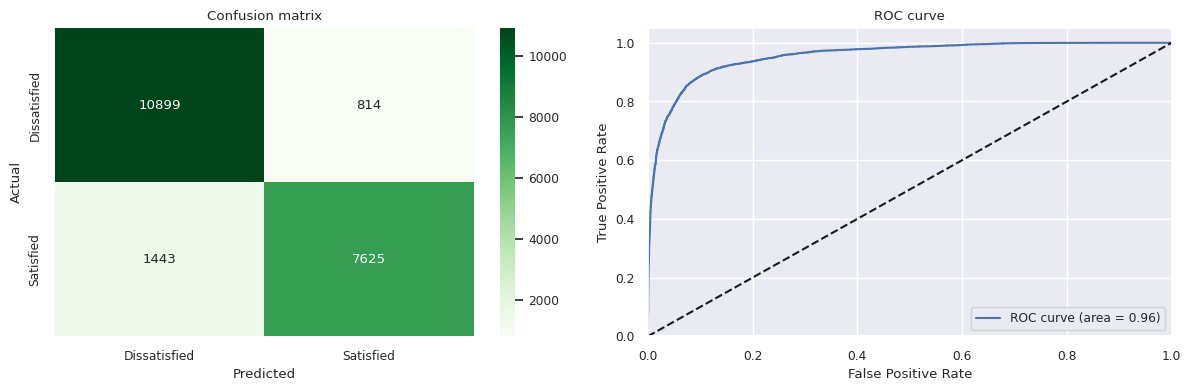

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Single layer 20 neurons Neural Network,0.889309,0.900851,0.836138,0.929844,0.867289,0.891391,0.903543,0.840869,0.930505,0.87108


In [40]:
neural_network_single_20 = MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes= (20,), learning_rate = 'constant', solver= 'sgd')
df_results_nn_single_20 = classify("Single layer 20 neurons Neural Network", neural_network_single_20, X, Y )
display(df_results_nn_single_20)

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Single layer 10 neurons Neural Network,0.862517,0.835747,0.849042,0.87279,0.842342,0.865213,0.838574,0.855867,0.872449,0.847132
0,Single layer 20 neurons Neural Network,0.889309,0.900851,0.836138,0.929844,0.867289,0.891391,0.903543,0.840869,0.930505,0.87108
0,Two layer 20 neurons neural network,0.897225,0.876752,0.887115,0.904932,0.881903,0.898321,0.880595,0.887296,0.906856,0.883933


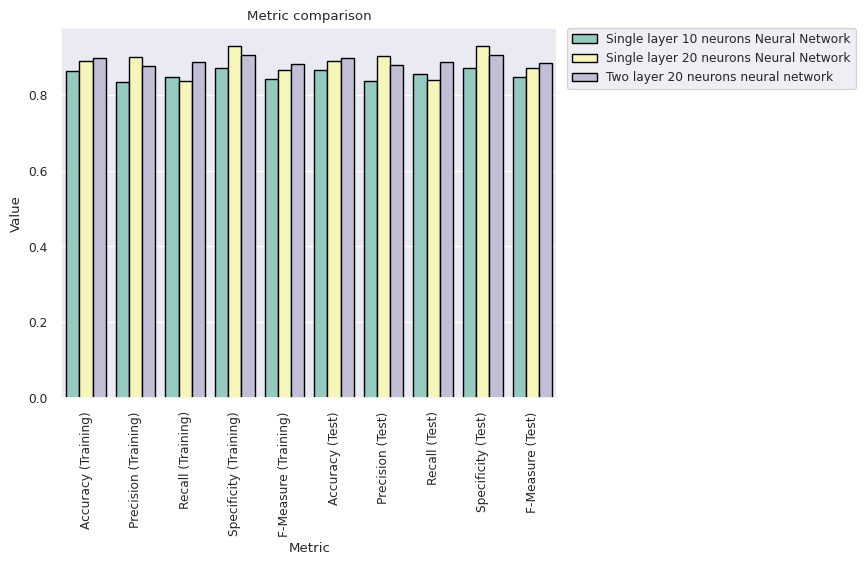

In [43]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_results_nn_single_10, df_results_nn_single_20, df_results_nn])
display(df_results)
comparison_plot(df_results)

As we can see the best model is the one found with the grid search.

## 4.7 Nearest Neighbor

Initially we develop a naive Nearest Neighbor model:

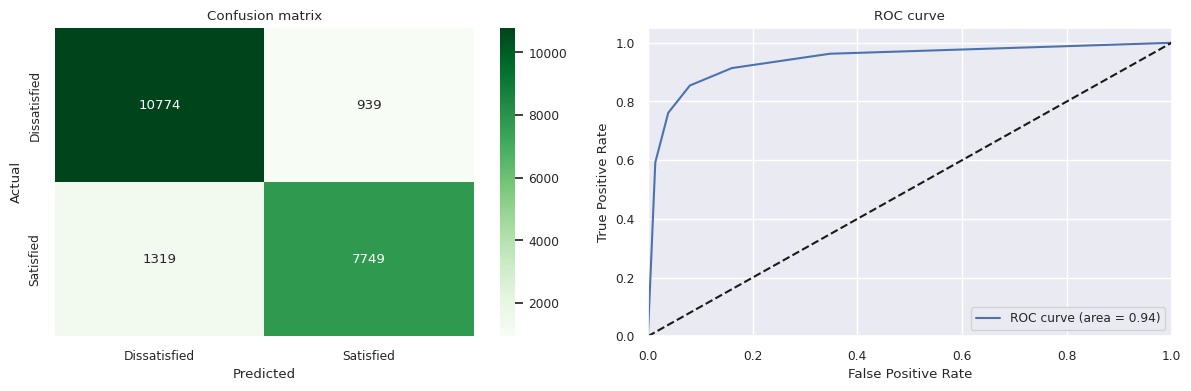

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Brute KNN Model,0.917941,0.920724,0.886642,0.941801,0.903362,0.891343,0.89192,0.854543,0.919833,0.872832


In [44]:
from sklearn.neighbors import KNeighborsClassifier

brute_knn_model = KNeighborsClassifier(n_jobs=-1,algorithm='brute', metric='euclidean')
df_results_brute_knn_model = classify('Brute KNN Model', brute_knn_model, X , Y)
display(df_results_brute_knn_model)

Now we train another model using kd-tree algorithm:

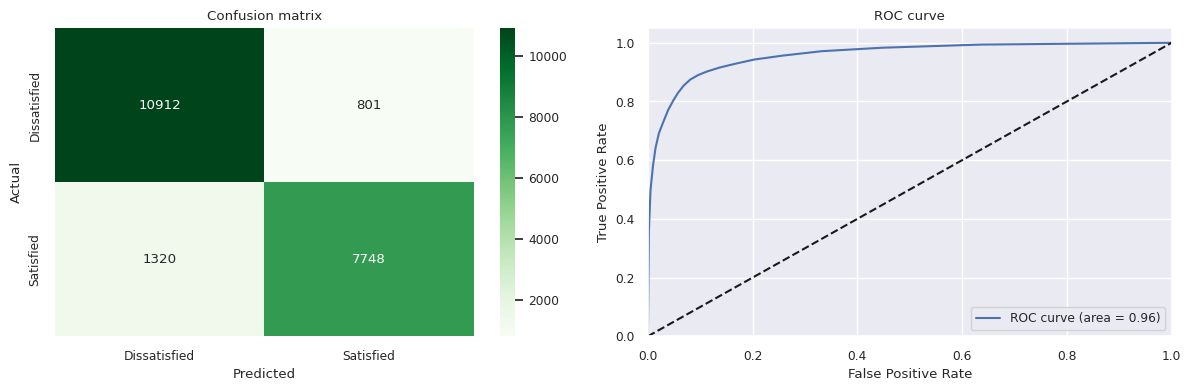

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,KNN Model grid,0.903132,0.912077,0.858859,0.936883,0.884668,0.897936,0.906305,0.854433,0.931614,0.879605


In [50]:
kdTree_knn_model = KNeighborsClassifier(n_jobs=-1,algorithm='kd_tree',metric='manhattan',leaf_size=100,n_neighbors=20)
df_results_knn_model = classify("KNN Model grid", kdTree_knn_model, X, Y )
display(df_results_knn_model)

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Brute KNN Model,0.917941,0.920724,0.886642,0.941801,0.903362,0.891343,0.89192,0.854543,0.919833,0.872832
0,KNN Model grid,0.903132,0.912077,0.858859,0.936883,0.884668,0.897936,0.906305,0.854433,0.931614,0.879605


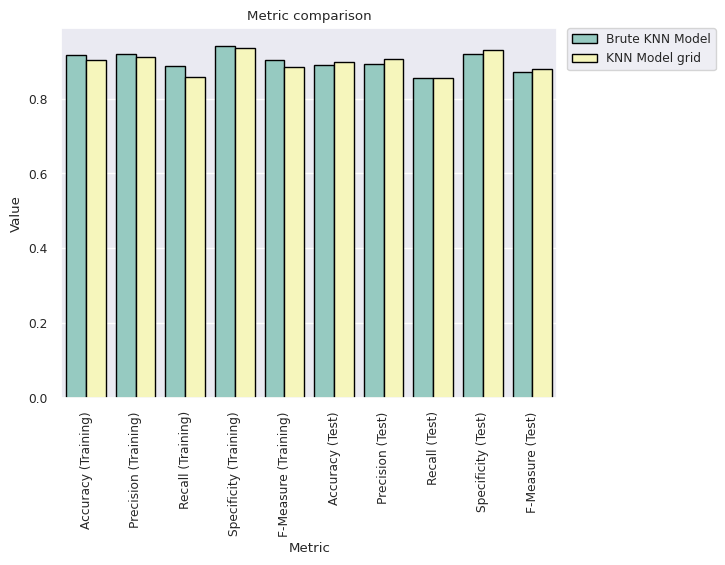

In [51]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_results_brute_knn_model, df_results_knn_model])
display(df_results)
comparison_plot(df_results)

The best model is the one obtained with the grid search.

## 4.8 Model selection

Now we compare the best models for each algorithm.

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Regression L1,0.839202,0.792349,0.851406,0.829899,0.820817,0.840239,0.793685,0.856528,0.827627,0.82391
0,SGD grid opt,0.840177,0.823239,0.802931,0.868571,0.812958,0.841297,0.824668,0.808116,0.866985,0.816308
0,Decision_trees_grid,0.922873,0.919974,0.899992,0.940317,0.909873,0.914537,0.911048,0.891156,0.932639,0.900992
0,Two layer 20 neurons neural network,0.897225,0.876752,0.887115,0.904932,0.881903,0.898321,0.880595,0.887296,0.906856,0.883933
0,KNN Model grid,0.903132,0.912077,0.858859,0.936883,0.884668,0.897936,0.906305,0.854433,0.931614,0.879605


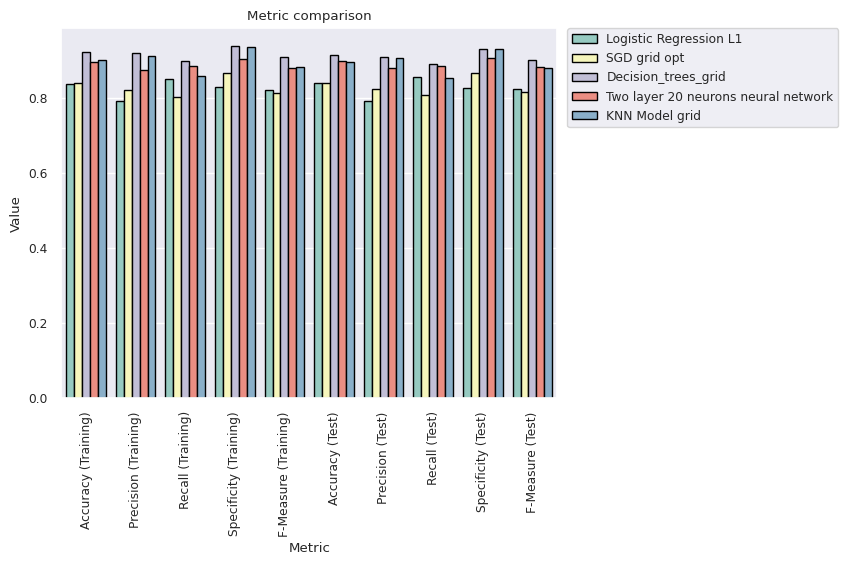

In [52]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_reg_l1,df_results_sgd_grid_opt, df_results_tree_grid, df_results_nn, df_results_knn_model])
display(df_results)
comparison_plot(df_results)

## 4.9 Ensemble classifiers

### Bagging

We're going to apply the bagging technique to decision trees with maximum depth set to 15:

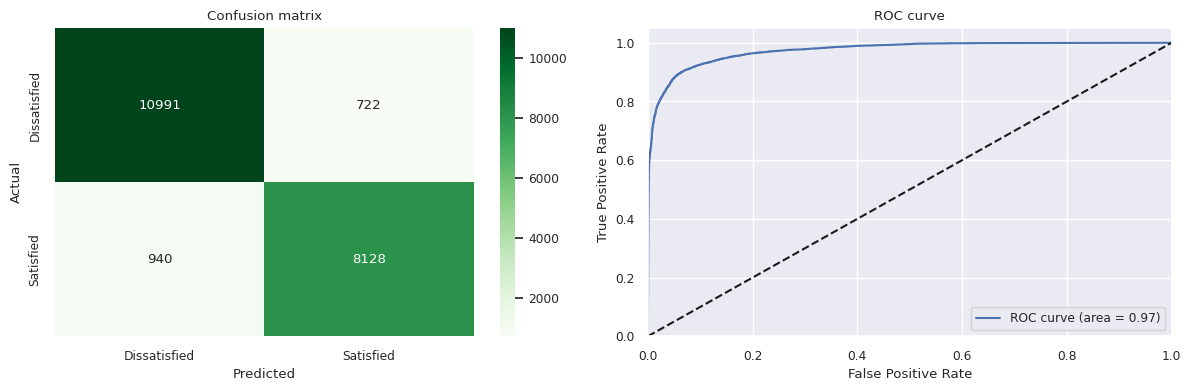

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Bagging,0.947788,0.949143,0.929082,0.962049,0.939006,0.920023,0.918418,0.896339,0.938359,0.907244


In [53]:
from sklearn.ensemble import BaggingClassifier

df_results_bagging = classify("Bagging", BaggingClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=30, bootstrap=True), X, Y)
display(df_results_bagging)

### Random Forest

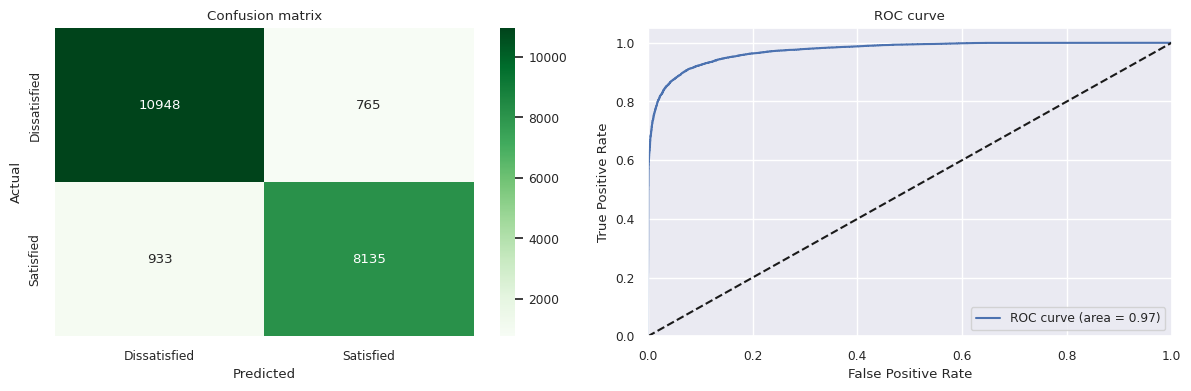

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Random Forest,0.939872,0.936546,0.923575,0.952296,0.930016,0.918291,0.914045,0.897111,0.934688,0.905499


In [54]:
from sklearn.ensemble import RandomForestClassifier

df_results_RF = classify("Random Forest",  RandomForestClassifier(n_estimators=30, max_depth=15, max_features = 'sqrt',random_state=42), X, Y)
display(df_results_RF)

### Comparison with single decision trees

Let's compare the two ensemble models created above with the previous single decision tree model:

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Bagging,0.947788,0.949143,0.929082,0.962049,0.939006,0.920023,0.918418,0.896339,0.938359,0.907244
0,Random Forest,0.939872,0.936546,0.923575,0.952296,0.930016,0.918291,0.914045,0.897111,0.934688,0.905499
0,Decision_trees_grid,0.922873,0.919974,0.899992,0.940317,0.909873,0.914537,0.911048,0.891156,0.932639,0.900992


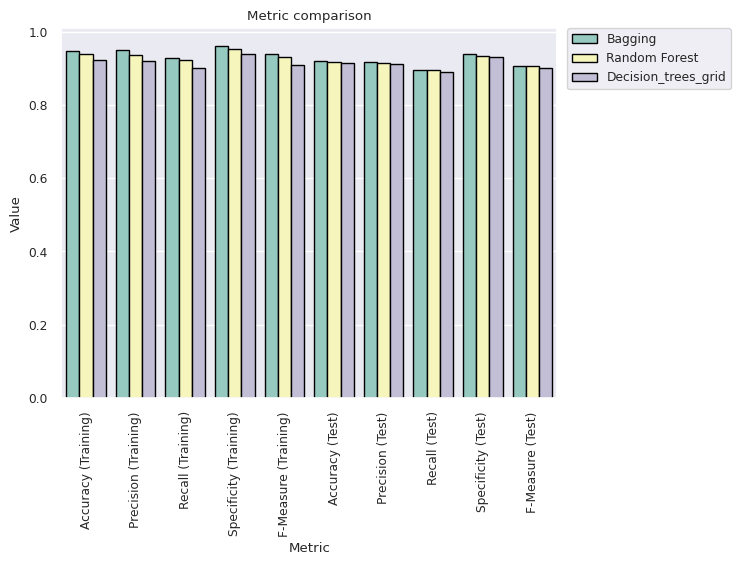

In [55]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([df_results_bagging, df_results_RF,df_results_tree_grid])
display(df_results)
comparison_plot(df_results)

Even though the ensemble methods are slightly better than the single decision tree, the improvement occurs mostly in the training phase, suggesting the presence of overfitting.

### Voting

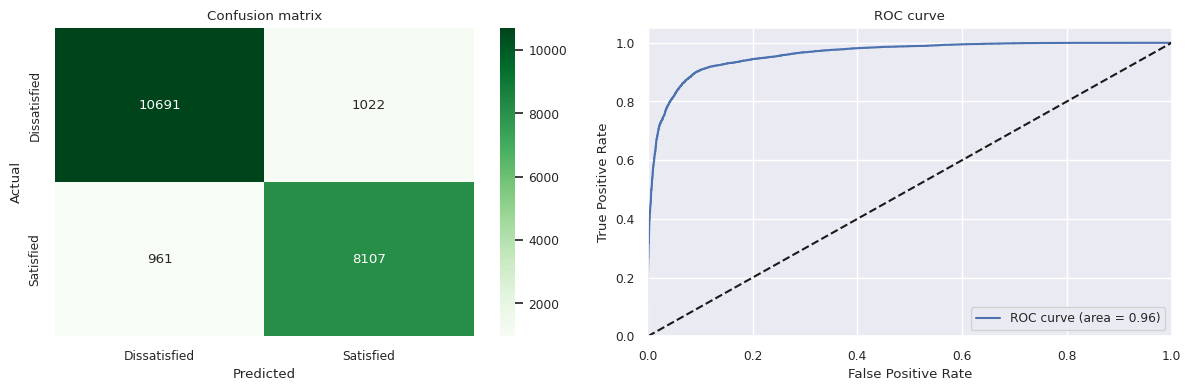

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Voting,0.905766,0.889745,0.892789,0.91566,0.891264,0.904576,0.888049,0.894023,0.912747,0.891026


In [56]:
from sklearn.ensemble import VotingClassifier

df_results_voting = classify("Voting",  VotingClassifier(
    estimators=[('DTC', DecisionTreeClassifier(max_depth=15, criterion='entropy',min_samples_leaf=13,min_samples_split=2)),
                ('MLP', neural_network),
                ('SGD', grid_search_opt),
                ('Logistic Regression', log_reg_l1),
                ('KNN', KNeighborsClassifier(n_jobs=-1,algorithm='kd_tree',leaf_size= 100,metric='manhattan',n_neighbors=20 ))],
    voting='soft'), X, Y)
display(df_results_voting)

### Boosting (AdaBoost)

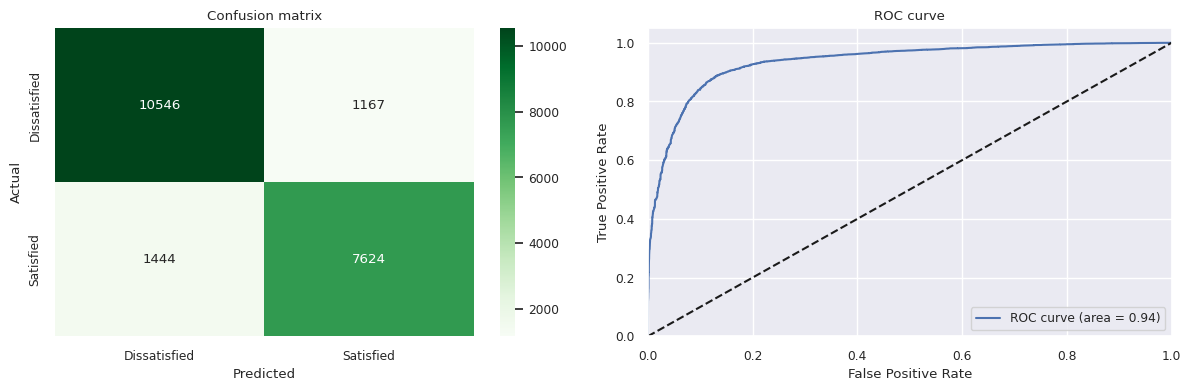

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,AdaBoost,0.875438,0.868314,0.839336,0.90296,0.853579,0.874356,0.867251,0.840759,0.900367,0.853799


In [57]:
from sklearn.ensemble import AdaBoostClassifier

df_results_AdaBoost = classify("AdaBoost",  AdaBoostClassifier(n_estimators=30, random_state=42), X, Y)
display(df_results_AdaBoost)

### Comparison of the ensemble models

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Bagging,0.947788,0.949143,0.929082,0.962049,0.939006,0.920023,0.918418,0.896339,0.938359,0.907244
0,Random Forest,0.939872,0.936546,0.923575,0.952296,0.930016,0.918291,0.914045,0.897111,0.934688,0.905499
0,Voting,0.905766,0.889745,0.892789,0.91566,0.891264,0.904576,0.888049,0.894023,0.912747,0.891026
0,AdaBoost,0.875438,0.868314,0.839336,0.90296,0.853579,0.874356,0.867251,0.840759,0.900367,0.853799


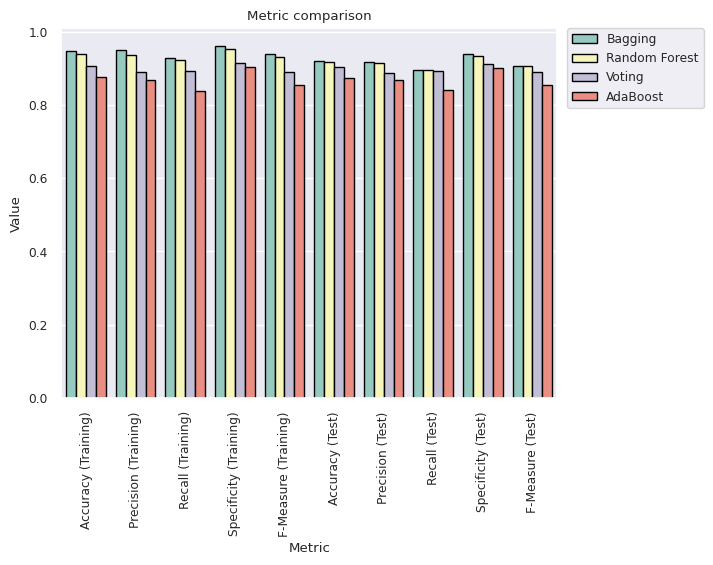

In [59]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([ df_results_bagging, df_results_RF, df_results_voting, df_results_AdaBoost])
display(df_results)
comparison_plot(df_results)

As we can see, the best ensemble methods are Bagging and Random Forest, both based on Decision Trees.

## 4.10 Final comparison between the models

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision_trees_grid,0.922873,0.919974,0.899992,0.940317,0.909873,0.914537,0.911048,0.891156,0.932639,0.900992
0,KNN Model grid,0.903132,0.912077,0.858859,0.936883,0.884668,0.897936,0.906305,0.854433,0.931614,0.879605
0,Bagging,0.947788,0.949143,0.929082,0.962049,0.939006,0.920023,0.918418,0.896339,0.938359,0.907244
0,Random Forest,0.939872,0.936546,0.923575,0.952296,0.930016,0.918291,0.914045,0.897111,0.934688,0.905499


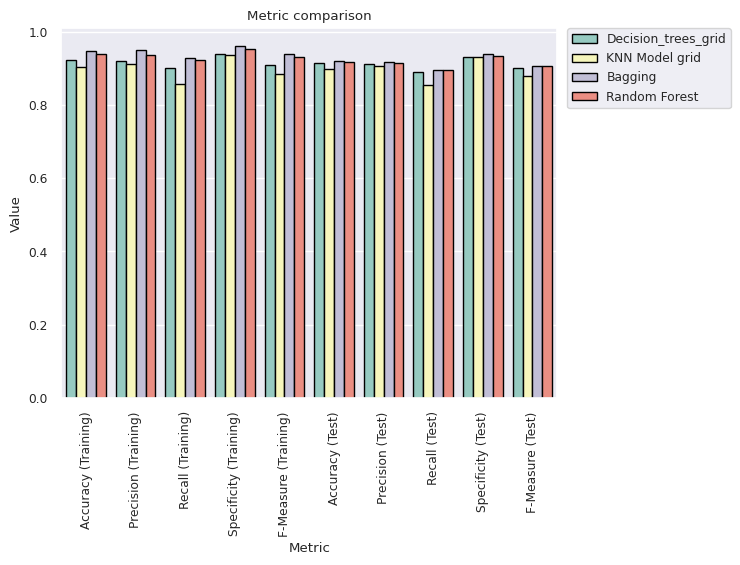

In [60]:
df_results.drop(df_results.index, inplace = True)
df_results = pd.concat([ df_results_tree_grid, df_results_knn_model, df_results_bagging, df_results_RF])
display(df_results)
comparison_plot(df_results)

# 5. Conclusion

After building and testing different classification models, we make our choice considering the following aspects:
<ul>
    <li> Model complexity: for the same performances, the simpler model is preferred </li>
    <li> Training time: for the same performances, the fastest training model is preferred </li>
</ul>
So, all things considered, we conclude that the best model is the decision tree, whose parameters were chosen with the grid search.